# Shaat Dikes paleomagnetic data analysis

## Import Python libraries

In [1]:
import pmagpy.pmag as pmag
import pmagpy.ipmag as ipmag
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', None)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Calculate present local field direction

In [2]:
Shaat_location_lat = 17.1 # N
Shaat_location_lon = 54.9 # E

Mirbat_plf_dec, Mirbat_plf_inc, _ = ipmag.igrf([2023, 0, Shaat_location_lat, Shaat_location_lon])
print('The present day geomagnetic field in the study location is:')
print('dec: ' + str(round(Mirbat_plf_dec,1)))
print('inc: ' + str(round(Mirbat_plf_inc,1)))

Mirbat_dipole_dec = 0
Mirbat_dipole_inc = ipmag.inc_from_lat(Shaat_location_lat)
print('')
print('The dipole field direction in the study location is:')
print('dec: ' + str(round(Mirbat_dipole_dec,1)))
print('inc: ' + str(round(Mirbat_dipole_inc,1)))

The present day geomagnetic field in the study location is:
dec: 0.9
inc: 23.9

The dipole field direction in the study location is:
dec: 0
inc: 31.6


## Load MagIC data tables and site table with more precise locations

Note that only the dikes in the Leger panel have a tilt-correction that we are confident about. 

**The other dikes need to have their SD_site_data['dir_tilt_correction'] == 100] rows deleted.**

In [3]:
SD_site_data = pd.read_csv('../data/pmag/sites.txt', sep='\t', header=1)
SD_specimen_data = pd.read_csv('../data/pmag/specimens.txt', sep='\t', header=1)

# get more precise site locations
SD_site_info = pd.read_csv('../data/field_data/site_locations.csv', sep=',', header=0, index_col='site')
SD_site_locations = pd.read_csv('../data/field_data/site_locations.csv', sep=',', header=0, index_col='site')[['latitude', 'longitude']]
# map site locations to site data
SD_site_data['lat'] = SD_site_locations['latitude'][SD_site_data['site']].tolist()
SD_site_data['lon'] = SD_site_locations['longitude'][SD_site_data['site']].tolist()

SD_site_data_gc = SD_site_data[SD_site_data['dir_tilt_correction'] == 0]
SD_site_data_tc = SD_site_data[SD_site_data['dir_tilt_correction'] == 100]
SD_specimen_data_gc = SD_specimen_data[SD_specimen_data['dir_tilt_correction'] == 0]
SD_specimen_data_tc = SD_specimen_data[SD_specimen_data['dir_tilt_correction'] == 100]

In [4]:
SD_site_info

,latitude,longitude,thickness,lithology,orientation,locale,comment
site,,,,,,,
SD1,17.0513,54.8528,3.30,mafic,NNW-SSE,southwest,NaN
SD2,17.0520,54.8509,2.70,mafic,NNW-SSE,southwest,NaN
SD3,17.0517,54.8503,3.30,mafic,NNW-SSE,southwest,NaN
SD4,17.0519,54.8565,1.60,mafic,NNW-SSE,southwest,NaN
SD5,17.0528,54.8583,3.60,mafic,NNW-SSE,southwest,NaN
SD6,17.0540,54.8590,2.50,mafic,NNW-SSE,southwest,NaN
SD7,17.0547,54.8589,2.50,mafic,NNW-SSE,southwest,NaN
SD8,17.0566,54.8610,1.40,mafic,NNW-SSE,southwest,NaN
SD9,17.0583,54.8624,1.70,mafic,NNW-SSE,southwest,NaN


## Low-temperature component

- Typically the low temperature component is removed largely by the low-temperature (77 K) demagnetization step and is typically fully removed by thermal demagnetization to 250ºC although it can persist to higher temperatures. 
- The directions correspond to the present-day field and present-day expected dipole direction.
- This demagnetization behavior and direction is consistent with the low-temperature component being a recently acquired viscous remanent magnetization.

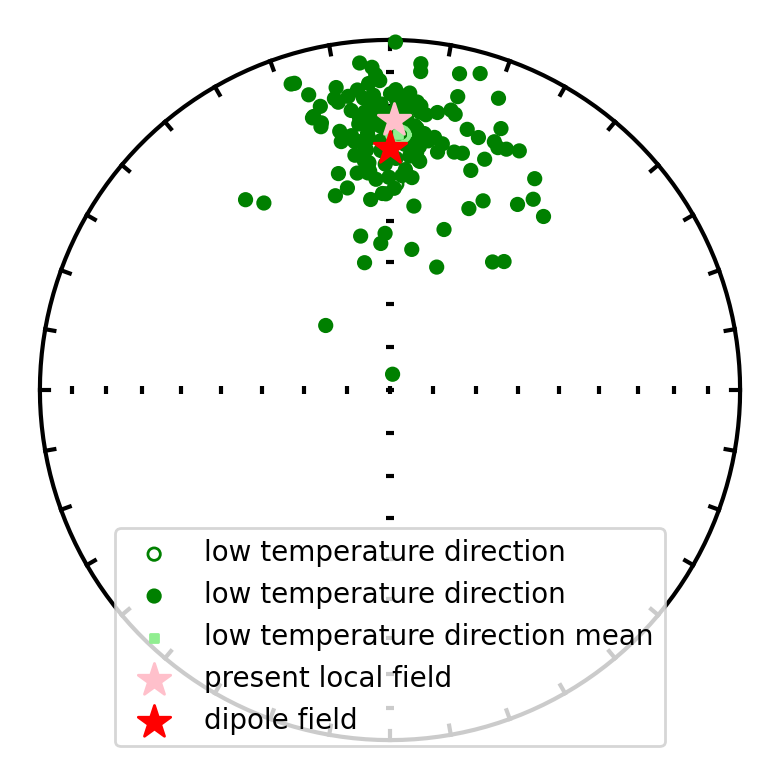

In [5]:
SD_specimen_lt_gc = SD_specimen_data_gc[SD_specimen_data_gc['dir_comp'] == 'lt'].reset_index(drop=True)
SD_specimen_lt_gc_mean = ipmag.fisher_mean(SD_specimen_lt_gc['dir_dec'], SD_specimen_lt_gc['dir_inc'])

plt.figure(figsize=(4,4))
ipmag.plot_net()
ipmag.plot_di(SD_specimen_lt_gc['dir_dec'], SD_specimen_lt_gc['dir_inc'], color='green', marker='o', label='low temperature direction')
ipmag.plot_di_mean(SD_specimen_lt_gc_mean['dec'], SD_specimen_lt_gc_mean['inc'], SD_specimen_lt_gc_mean['alpha95'], 
                   color='lightgreen', marker='s', markersize = 10, label='low temperature direction mean')
ipmag.plot_di(Mirbat_plf_dec, Mirbat_plf_inc, color='pink', marker='*', markersize = 150, label='present local field')
ipmag.plot_di(Mirbat_dipole_dec, Mirbat_dipole_inc, color='red', marker='*', markersize = 150, label='dipole field')
plt.legend(loc='lower center')
plt.show()

## Shaat dikes magnetite component

We are confident about tilt corrections for the Leger dikes panel and will therefore focus on the data from the panel. The fits named 'mag' within the MagIC files were fit to the characteristic unblocking temperatures of low-titanium titanomagnetite.

The main set of dikes are those in a NNW-SSE orientation. They cross-cut dikes in a E-W orientation. We will split the dikes into these two populations so they can be plotted accordingly.

In [6]:
SD_sites_Leger_NNW = SD_site_info[(SD_site_info['locale'] == 'Leger') & (SD_site_info['orientation'] == 'NNW-SSE')]
SD_sites_Leger_NNW_gc = SD_site_data_gc[SD_site_data_gc['site'].isin(SD_sites_Leger_NNW.index)].reset_index(drop=True)
SD_sites_Leger_NNW_tc = SD_site_data_tc[SD_site_data_tc['site'].isin(SD_sites_Leger_NNW.index)].reset_index(drop=True)
SD_sites_Leger_NNW_mag_gc = SD_sites_Leger_NNW_gc[SD_sites_Leger_NNW_gc['dir_comp_name'] == 'mag'].reset_index(drop=True)
SD_sites_Leger_NNW_mag_tc = SD_sites_Leger_NNW_tc[SD_sites_Leger_NNW_tc['dir_comp_name'] == 'mag'].reset_index(drop=True)

In [7]:
SD_sites_Leger_E = SD_site_info[(SD_site_info['locale'] == 'Leger') & (SD_site_info['orientation'] == 'E-W')]
SD_sites_Leger_E_gc = SD_site_data_gc[SD_site_data_gc['site'].isin(SD_sites_Leger_E.index)].reset_index(drop=True)
SD_sites_Leger_E_tc = SD_site_data_tc[SD_site_data_tc['site'].isin(SD_sites_Leger_E.index)].reset_index(drop=True)
SD_sites_Leger_E_mag_gc = SD_sites_Leger_E_gc[SD_sites_Leger_E_gc['dir_comp_name'] == 'mag'].reset_index(drop=True)
SD_sites_Leger_E_mag_tc = SD_sites_Leger_E_tc[SD_sites_Leger_E_tc['dir_comp_name'] == 'mag'].reset_index(drop=True)

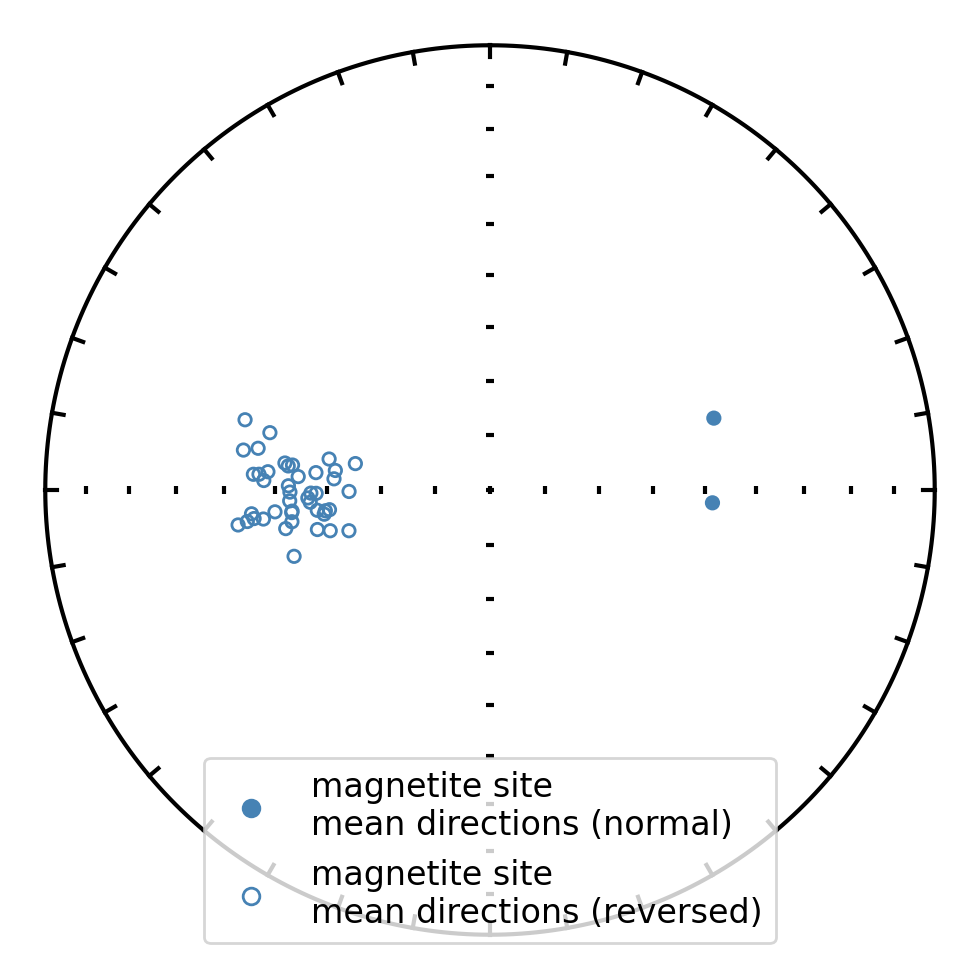

mean of geographic coordinates NNW-SSE magnetite site directions:

Dec: 88.8  Inc: 53.2
Number of directions in mean (n): 45
Angular radius of 95% confidence (a_95): 2.1
Precision parameter (k) estimate: 100.1

paleolatitude calculated from mean inclination: 33.8


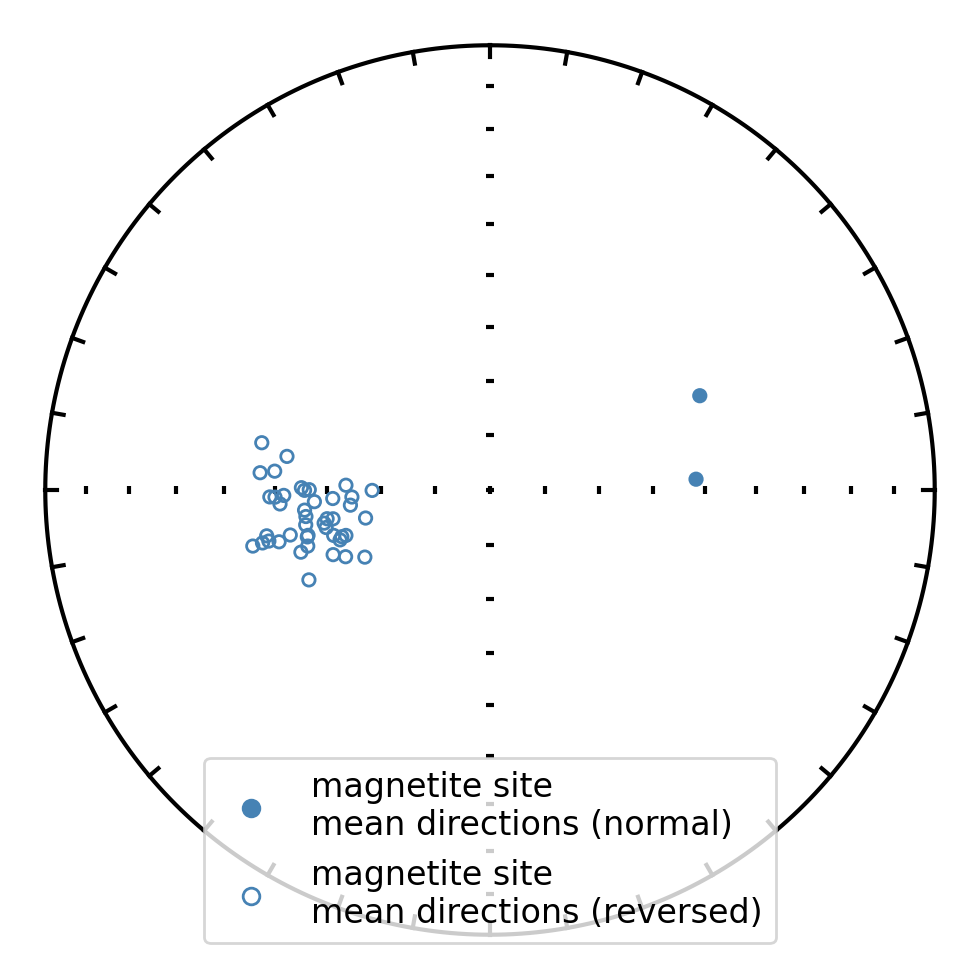

mean of geographic coordinates NNW-SSE magnetite site directions:

Dec: 81.0  Inc: 55.9
Number of directions in mean (n): 45
Angular radius of 95% confidence (a_95): 2.1
Precision parameter (k) estimate: 100.2

paleolatitude calculated from mean inclination: 36.4


In [8]:
plt.figure(figsize=(5,5))
ipmag.plot_net()
ipmag.plot_di(SD_sites_Leger_NNW_mag_gc['dir_dec'], 
              SD_sites_Leger_NNW_mag_gc['dir_inc'], 
              color='steelblue', marker='o', label='magnetite site\nmean directions',
              markersize=20)
# Create custom handles for the legend
normal_handle = plt.Line2D([], [], color='steelblue', marker='o', 
                           linestyle='None', label='magnetite site\nmean directions (normal)')
reversed_handle = plt.Line2D([], [], color='steelblue', marker='o', 
                             linestyle='None', mfc='none', label='magnetite site\nmean directions (reversed)')

# Add legend
plt.legend(handles=[normal_handle, reversed_handle], loc='lower center', fontsize=12)
plt.show()

SD_sites_Leger_NNW_mag_gc_diblock = ipmag.make_di_block(SD_sites_Leger_NNW_mag_gc['dir_dec'],
                                                        SD_sites_Leger_NNW_mag_gc['dir_inc'])
SD_sites_Leger_NNW_mag_gc_unified = pmag.flip(SD_sites_Leger_NNW_mag_gc_diblock, combine=True)
SD_sites_Leger_NNW_mag_gc_unified_mean = ipmag.fisher_mean(di_block=SD_sites_Leger_NNW_mag_gc_unified)

print('mean of geographic coordinates NNW-SSE magnetite site directions:')
print('')
ipmag.print_direction_mean(SD_sites_Leger_NNW_mag_gc_unified_mean)
plat_from_inc = ipmag.lat_from_inc(SD_sites_Leger_NNW_mag_gc_unified_mean['inc'])
print('')
print('paleolatitude calculated from mean inclination: ' + str(round(plat_from_inc,1)))

plt.figure(figsize=(5,5))
ipmag.plot_net()
ipmag.plot_di(SD_sites_Leger_NNW_mag_tc['dir_dec'], 
              SD_sites_Leger_NNW_mag_tc['dir_inc'], 
              color='steelblue', marker='o', label='magnetite site\nmean directions',
              markersize=20)
# Create custom handles for the legend
normal_handle = plt.Line2D([], [], color='steelblue', marker='o', 
                           linestyle='None', label='magnetite site\nmean directions (normal)')
reversed_handle = plt.Line2D([], [], color='steelblue', marker='o', 
                             linestyle='None', mfc='none', label='magnetite site\nmean directions (reversed)')

# Add legend
plt.legend(handles=[normal_handle, reversed_handle], loc='lower center', fontsize=12)

plt.show()

SD_sites_Leger_NNW_mag_tc_diblock = ipmag.make_di_block(SD_sites_Leger_NNW_mag_tc['dir_dec'],
                                                        SD_sites_Leger_NNW_mag_tc['dir_inc'])
SD_sites_Leger_NNW_mag_tc_unified = pmag.flip(SD_sites_Leger_NNW_mag_tc_diblock, combine=True)
SD_sites_Leger_NNW_mag_tc_unified_mean = ipmag.fisher_mean(di_block=SD_sites_Leger_NNW_mag_tc_unified)

print('mean of geographic coordinates NNW-SSE magnetite site directions:')
print('')
ipmag.print_direction_mean(SD_sites_Leger_NNW_mag_tc_unified_mean)
plat_from_inc = ipmag.lat_from_inc(SD_sites_Leger_NNW_mag_tc_unified_mean['inc'])
print('')
print('paleolatitude calculated from mean inclination: ' + str(round(plat_from_inc,1)))

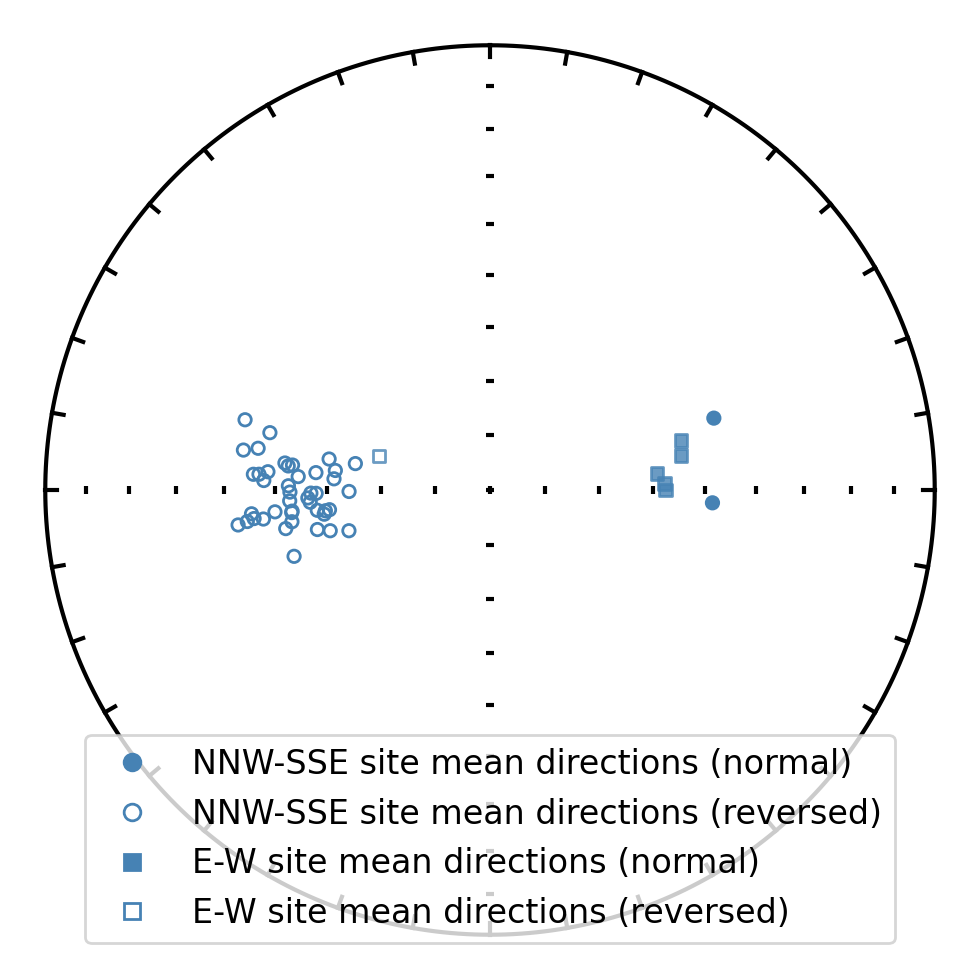

mean of geographic coordinates all magnetite site directions:

Dec: 88.5  Inc: 53.9
Number of directions in mean (n): 51
Angular radius of 95% confidence (a_95): 2.0
Precision parameter (k) estimate: 98.1

paleolatitude calculated from mean inclination: 34.4


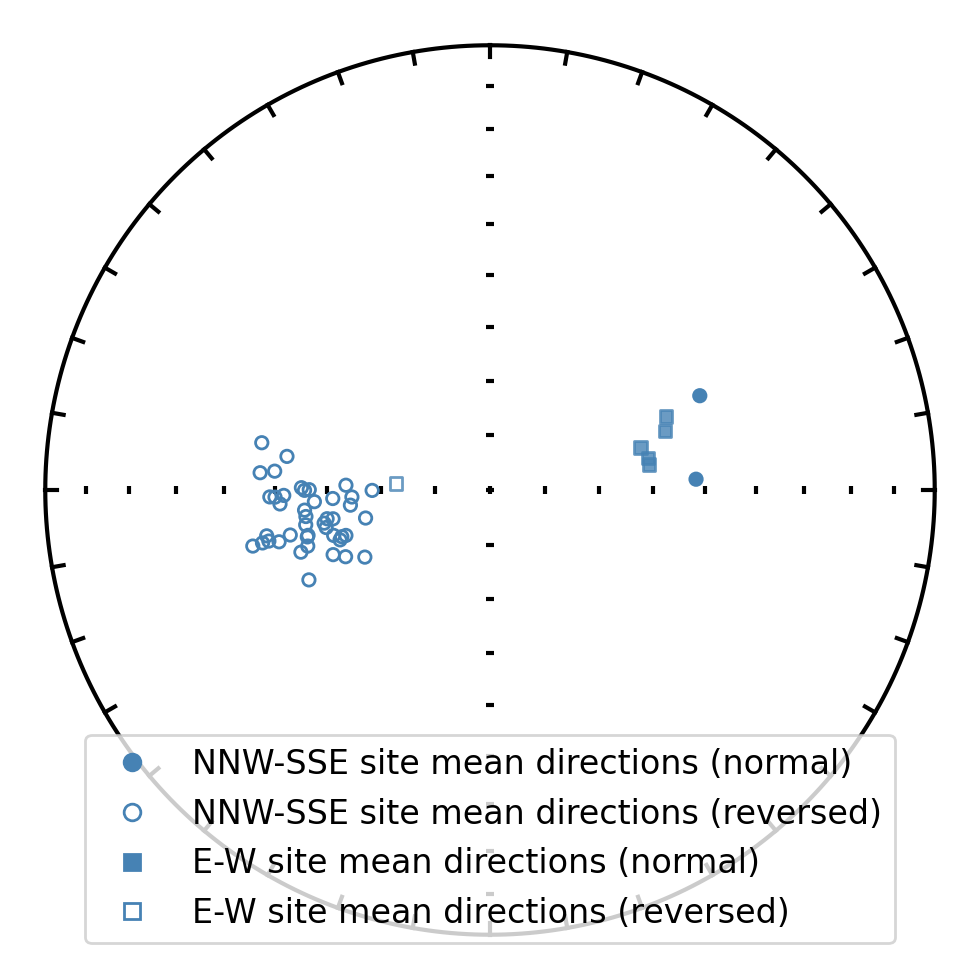

mean of tilt-corrected coordinates all magnetite site directions:

Dec: 80.5  Inc: 56.5
Number of directions in mean (n): 51
Angular radius of 95% confidence (a_95): 2.0
Precision parameter (k) estimate: 98.2

paleolatitude calculated from mean inclination: 37.1


In [9]:
plt.figure(figsize=(5,5))
ipmag.plot_net()
ipmag.plot_di(SD_sites_Leger_NNW_mag_gc['dir_dec'], 
              SD_sites_Leger_NNW_mag_gc['dir_inc'], 
              color='steelblue', marker='o', label='magnetite site\nmean directions',
              markersize=20)
ipmag.plot_di(SD_sites_Leger_E_mag_gc['dir_dec'], 
              SD_sites_Leger_E_mag_gc['dir_inc'], 
              color='steelblue', marker='s', label='magnetite site\nmean directions',
              markersize=20,alpha=0.8)
# Create custom handles for the legend
normal_handle_NNW = plt.Line2D([], [], color='steelblue', marker='o', 
                           linestyle='None', label='NNW-SSE site mean directions (normal)')
reversed_handle_NNW = plt.Line2D([], [], color='steelblue', marker='o', 
                             linestyle='None', mfc='none', label='NNW-SSE site mean directions (reversed)')
normal_handle_E = plt.Line2D([], [], color='steelblue', marker='s', 
                           linestyle='None', label='E-W site mean directions (normal)')
reversed_handle_E = plt.Line2D([], [], color='steelblue', marker='s', 
                             linestyle='None', mfc='none', label='E-W site mean directions (reversed)')

# Add legend
plt.legend(handles=[normal_handle_NNW, reversed_handle_NNW, normal_handle_E, reversed_handle_E], 
           loc='lower center', fontsize=12)
plt.show()

SD_sites_Leger_all_mag_dec_gc = SD_sites_Leger_NNW_mag_gc['dir_dec'].tolist() + SD_sites_Leger_E_mag_gc['dir_dec'].tolist()
SD_sites_Leger_all_mag_inc_gc = SD_sites_Leger_NNW_mag_gc['dir_inc'].tolist() + SD_sites_Leger_E_mag_gc['dir_inc'].tolist()

SD_sites_Leger_all_mag_gc_diblock = ipmag.make_di_block(SD_sites_Leger_all_mag_dec_gc, SD_sites_Leger_all_mag_inc_gc)
SD_sites_Leger_all_mag_gc_unified = pmag.flip(SD_sites_Leger_all_mag_gc_diblock, combine=True)
SD_sites_Leger_all_mag_gc_unified_mean = ipmag.fisher_mean(di_block=SD_sites_Leger_all_mag_gc_unified)

print('mean of geographic coordinates all magnetite site directions:')
print('')
ipmag.print_direction_mean(SD_sites_Leger_all_mag_gc_unified_mean)
plat_from_inc = ipmag.lat_from_inc(SD_sites_Leger_all_mag_gc_unified_mean['inc'])
print('')
print('paleolatitude calculated from mean inclination: ' + str(round(plat_from_inc,1)))

plt.figure(figsize=(5,5))
ipmag.plot_net()
ipmag.plot_di(SD_sites_Leger_NNW_mag_tc['dir_dec'], 
              SD_sites_Leger_NNW_mag_tc['dir_inc'], 
              color='steelblue', marker='o', label='magnetite site\nmean directions',
              markersize=20)
ipmag.plot_di(SD_sites_Leger_E_mag_tc['dir_dec'], 
              SD_sites_Leger_E_mag_tc['dir_inc'], 
              color='steelblue', marker='s', label='magnetite site\nmean directions',
              markersize=20,alpha=0.8)
# Create custom handles for the legend
normal_handle_NNW = plt.Line2D([], [], color='steelblue', marker='o', 
                           linestyle='None', label='NNW-SSE site mean directions (normal)')
reversed_handle_NNW = plt.Line2D([], [], color='steelblue', marker='o', 
                             linestyle='None', mfc='none', label='NNW-SSE site mean directions (reversed)')
normal_handle_E = plt.Line2D([], [], color='steelblue', marker='s', 
                           linestyle='None', label='E-W site mean directions (normal)')
reversed_handle_E = plt.Line2D([], [], color='steelblue', marker='s', 
                             linestyle='None', mfc='none', label='E-W site mean directions (reversed)')

# Add legend
plt.legend(handles=[normal_handle_NNW, reversed_handle_NNW, normal_handle_E, reversed_handle_E], 
           loc='lower center', fontsize=12)
plt.savefig('./output/SD_site_data_Leger_mag_tc.pdf')
plt.show()

SD_sites_Leger_all_mag_dec_tc = SD_sites_Leger_NNW_mag_tc['dir_dec'].tolist() + SD_sites_Leger_E_mag_tc['dir_dec'].tolist()
SD_sites_Leger_all_mag_inc_tc = SD_sites_Leger_NNW_mag_tc['dir_inc'].tolist() + SD_sites_Leger_E_mag_tc['dir_inc'].tolist()

SD_sites_Leger_all_mag_tc_diblock = ipmag.make_di_block(SD_sites_Leger_all_mag_dec_tc, SD_sites_Leger_all_mag_inc_tc)
SD_sites_Leger_all_mag_tc_unified = pmag.flip(SD_sites_Leger_all_mag_tc_diblock, combine=True)
SD_sites_Leger_all_mag_tc_unified_mean = ipmag.fisher_mean(di_block=SD_sites_Leger_all_mag_tc_unified)

print('mean of tilt-corrected coordinates all magnetite site directions:')
print('')
ipmag.print_direction_mean(SD_sites_Leger_all_mag_tc_unified_mean)
plat_from_inc = ipmag.lat_from_inc(SD_sites_Leger_all_mag_tc_unified_mean['inc'])
print('')
print('paleolatitude calculated from mean inclination: ' + str(round(plat_from_inc,1)))

### Plot with dated dikes

SD50 is a dated felsic dike that has a magnetite component sitting within the main population of reversed mafic dike directions
SD51 is a mafic dike collected in baked zone of Leger granite

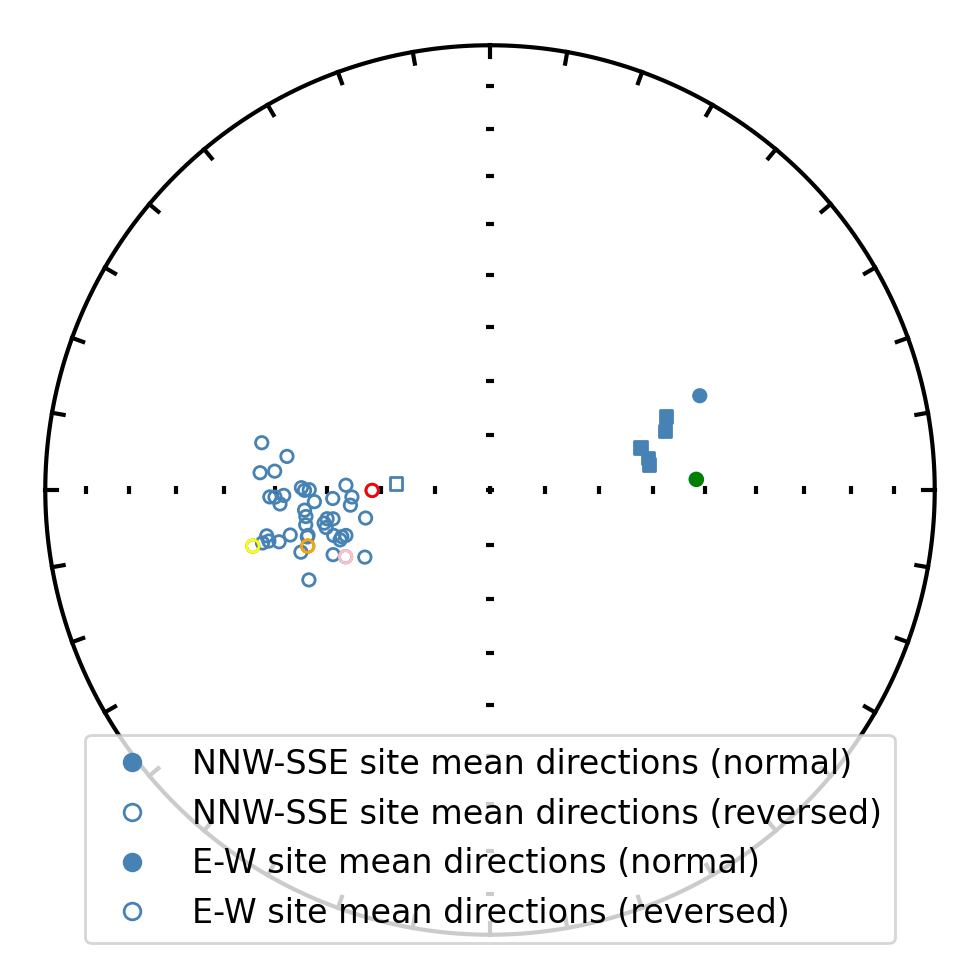

In [10]:
SD37_site_data_mag = SD_sites_Leger_NNW_mag_tc[SD_sites_Leger_NNW_mag_tc['site'] == 'SD37'].reset_index(drop=True)
SD39_site_data_mag = SD_sites_Leger_NNW_mag_tc[SD_sites_Leger_NNW_mag_tc['site'] == 'SD39'].reset_index(drop=True)
SD50_site_data_mag = SD_sites_Leger_NNW_mag_tc[SD_sites_Leger_NNW_mag_tc['site'] == 'SD50'].reset_index(drop=True)
SD51_site_data_mag = SD_sites_Leger_NNW_mag_tc[SD_sites_Leger_NNW_mag_tc['site'] == 'SD51'].reset_index(drop=True)
SD95_site_data_mag = SD_sites_Leger_NNW_mag_tc[SD_sites_Leger_NNW_mag_tc['site'] == 'SD95'].reset_index(drop=True)

plt.figure(figsize=(5,5))
ipmag.plot_net()
ipmag.plot_di(SD_sites_Leger_NNW_mag_tc['dir_dec'], 
              SD_sites_Leger_NNW_mag_tc['dir_inc'], 
              color='steelblue', marker='o', label='magnetite site\nmean directions',
              markersize=20)
ipmag.plot_di(SD_sites_Leger_E_mag_tc['dir_dec'], 
              SD_sites_Leger_E_mag_tc['dir_inc'], 
              color='steelblue', marker='s', label='magnetite site\nmean directions',
              markersize=20)

ipmag.plot_di(SD37_site_data_mag['dir_dec'], 
              SD37_site_data_mag['dir_inc'], 
              color='green', marker='o', label='magnetite site\nmean directions',
              markersize=20)
ipmag.plot_di(SD39_site_data_mag['dir_dec'], 
              SD39_site_data_mag['dir_inc'], 
              color='yellow', marker='o', label='magnetite site\nmean directions',
              markersize=20)
ipmag.plot_di(SD50_site_data_mag['dir_dec'], 
              SD50_site_data_mag['dir_inc'], 
              color='red', marker='o', label='magnetite site\nmean directions',
              markersize=20)
ipmag.plot_di(SD51_site_data_mag['dir_dec'], 
              SD51_site_data_mag['dir_inc'], 
              color='orange', marker='o', label='magnetite site\nmean directions',
              markersize=20)
ipmag.plot_di(SD95_site_data_mag['dir_dec'], 
              SD95_site_data_mag['dir_inc'], 
              color='pink', marker='o', label='magnetite site\nmean directions',
              markersize=20)

normal_handle_NNW = plt.Line2D([], [], color='steelblue', marker='o', 
                           linestyle='None', label='NNW-SSE site mean directions (normal)')
reversed_handle_NNW = plt.Line2D([], [], color='steelblue', marker='o', 
                             linestyle='None', mfc='none', label='NNW-SSE site mean directions (reversed)')
normal_handle_E = plt.Line2D([], [], color='steelblue', marker='o', 
                           linestyle='None', label='E-W site mean directions (normal)')
reversed_handle_E = plt.Line2D([], [], color='steelblue', marker='o', 
                             linestyle='None', mfc='none', label='E-W site mean directions (reversed)')

# Add legend
plt.legend(handles=[normal_handle_NNW, reversed_handle_NNW, normal_handle_E, reversed_handle_E], 
           loc='lower center', fontsize=12)

plt.savefig('./output/SD_site_data_Leger_mag_geochron.pdf', dpi=300)
plt.show()

### Reversal tests

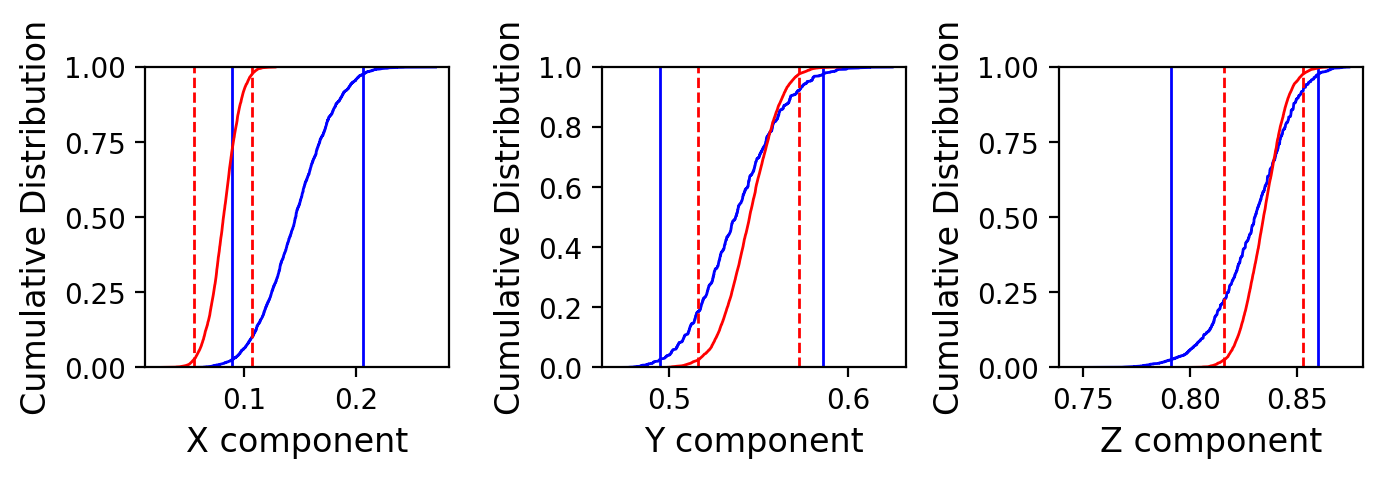

Pass


1

In [11]:
ipmag.reversal_test_bootstrap(dec=SD_sites_Leger_all_mag_dec_tc, 
                              inc=SD_sites_Leger_all_mag_inc_tc)

In [12]:
ipmag.reversal_test_MM1990(dec=SD_sites_Leger_all_mag_dec_tc, 
                           inc=SD_sites_Leger_all_mag_inc_tc)

Results of Watson V test: 

Watson's V:           3.4
Critical value of V:  7.1
"Pass": Since V is less than Vcrit, the null hypothesis
that the two populations are drawn from distributions
that share a common mean direction can not be rejected.

M&M1990 classification:

Angle between data set means: 3.7
Critical angle for M&M1990:   5.4
The McFadden and McElhinny (1990) classification for
this test is: 'B'


(1, 3.7442406779175474, 5.43028319495452, 'B')

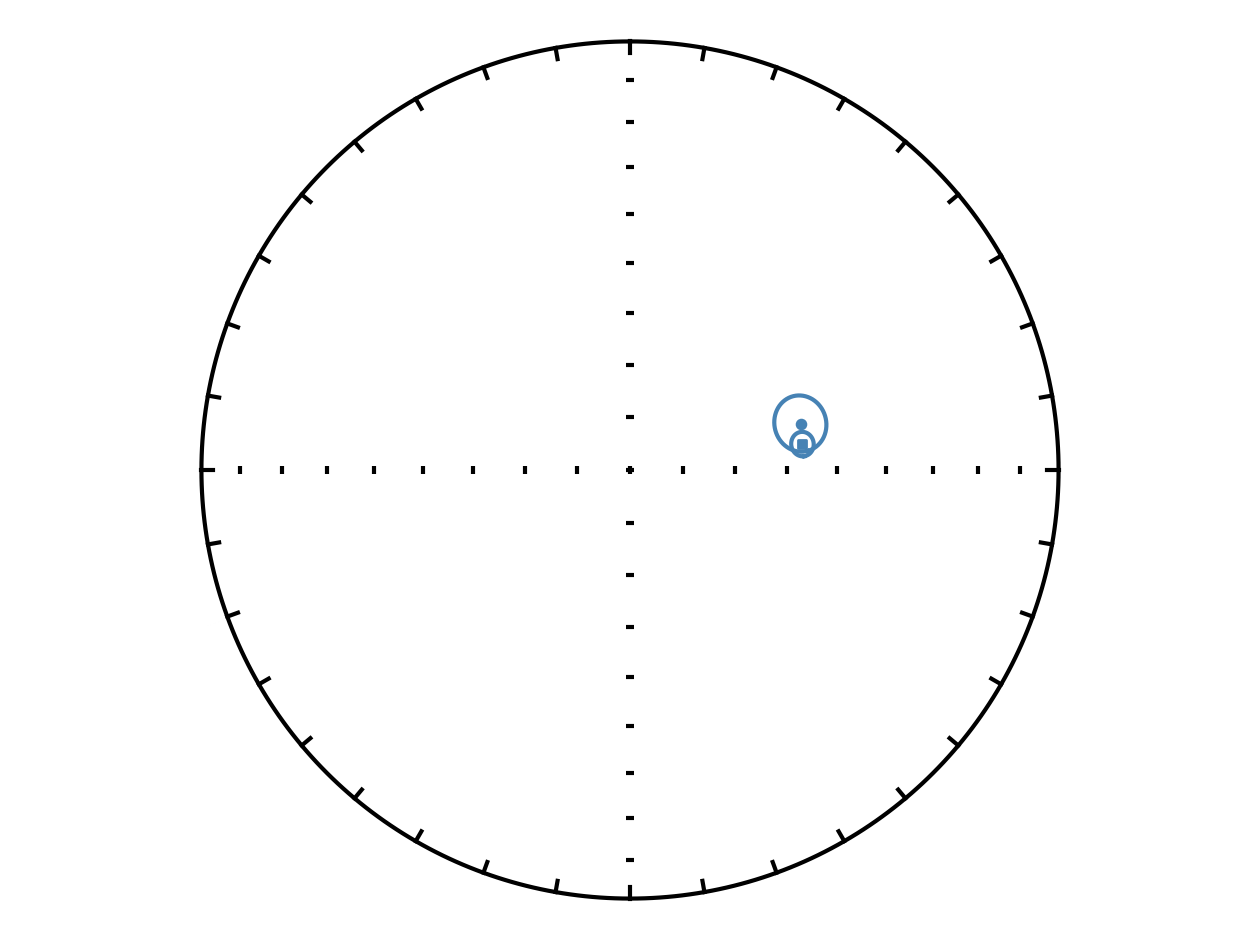

In [13]:
combined_di_block = ipmag.make_di_block(SD_sites_Leger_all_mag_dec_tc, SD_sites_Leger_all_mag_inc_tc)

normal, reversed = pmag.flip(combined_di_block)

N_mean = ipmag.fisher_mean(di_block=normal)
R_mean = ipmag.fisher_mean(di_block=reversed)

ipmag.plot_net()
ipmag.plot_di_mean(N_mean['dec'], N_mean['inc'], N_mean['alpha95'], color='steelblue', marker='o', markersize=10)
ipmag.plot_di_mean(R_mean['dec'], R_mean['inc'], R_mean['alpha95'], color='steelblue', marker='s', markersize=10)

In [14]:
ipmag.common_mean_bayes(normal, reversed)

Common mean: strong support


(26.50798352757919, 0.9636469173032108, 'Common mean: strong support')

### Paleomagnetic pole calculation

In [15]:
SD_sites_Leger_NNW_vgp_lon = []
SD_sites_Leger_NNW_vgp_lat = []
SD_sites_Leger_E_vgp_lon = []
SD_sites_Leger_E_vgp_lat = []

for i in range(len(SD_sites_Leger_NNW_mag_tc)):
    vgp_lon_i, vgp_lat_i, dp, dm = pmag.dia_vgp(SD_sites_Leger_NNW_mag_tc['dir_dec'][i], 
                                                SD_sites_Leger_NNW_mag_tc['dir_inc'][i], 
                                                1,
                                                SD_sites_Leger_NNW_mag_tc['lat'][i], 
                                                SD_sites_Leger_NNW_mag_tc['lon'][i])
    if vgp_lon_i > 180:
        vgp_lon_i = vgp_lon_i-180
        vgp_lat_i = -vgp_lat_i
        
    SD_sites_Leger_NNW_vgp_lon.append(vgp_lon_i)
    SD_sites_Leger_NNW_vgp_lat.append(vgp_lat_i)
    
for i in range(len(SD_sites_Leger_E_mag_tc)):
    vgp_lon_i, vgp_lat_i, dp, dm = pmag.dia_vgp(SD_sites_Leger_E_mag_tc['dir_dec'][i], 
                                                SD_sites_Leger_E_mag_tc['dir_inc'][i], 
                                                1,
                                                SD_sites_Leger_E_mag_tc['lat'][i], 
                                                SD_sites_Leger_E_mag_tc['lon'][i])
    if vgp_lon_i > 180:
        vgp_lon_i = vgp_lon_i-180
        vgp_lat_i = -vgp_lat_i
        
    SD_sites_Leger_E_vgp_lon.append(vgp_lon_i)
    SD_sites_Leger_E_vgp_lat.append(vgp_lat_i)
    
mean_Shaat_pole_NNW = ipmag.fisher_mean(SD_sites_Leger_NNW_vgp_lon, SD_sites_Leger_NNW_vgp_lat)
print('mean pole of NNW-SSE magnetite site VGPs:')
ipmag.print_pole_mean(mean_Shaat_pole_NNW)
print('')
Shaat_NNW_pole_colat = pmag.angle([mean_Shaat_pole_NNW['dec'], mean_Shaat_pole_NNW['inc']], [Shaat_location_lon, Shaat_location_lat])
Shaat_NNW_pole_paleolat = 90 - Shaat_NNW_pole_colat[0]
print('paleolatitude of NNW-SSE magnetite pole:')
print(round(Shaat_NNW_pole_paleolat,1))
print('')
print('')

combined_vgp_lon = SD_sites_Leger_NNW_vgp_lon + SD_sites_Leger_E_vgp_lon
combined_vgp_lat = SD_sites_Leger_NNW_vgp_lat + SD_sites_Leger_E_vgp_lat

mean_Shaat_pole_all = ipmag.fisher_mean(combined_vgp_lon, combined_vgp_lat)
print('mean pole of all magnetite site VGPs:')
ipmag.print_pole_mean(mean_Shaat_pole_all)
print('')
Shaat_all_pole_colat = pmag.angle([mean_Shaat_pole_all['dec'], mean_Shaat_pole_all['inc']], [Shaat_location_lon, Shaat_location_lat])
Shaat_all_pole_paleolat = 90 - Shaat_all_pole_colat[0]
print('paleolatitude of all magnetite pole:')
print(round(Shaat_all_pole_paleolat,1))

mean pole of NNW-SSE magnetite site VGPs:
Plon: 110.8  Plat: 17.3
Number of directions in mean (n): 45
Angular radius of 95% confidence (A_95): 2.6
Precision parameter (k) estimate: 67.6

paleolatitude of NNW-SSE magnetite pole:
36.8


mean pole of all magnetite site VGPs:
Plon: 110.1  Plat: 17.8
Number of directions in mean (n): 51
Angular radius of 95% confidence (A_95): 2.5
Precision parameter (k) estimate: 65.1

paleolatitude of all magnetite pole:
37.5


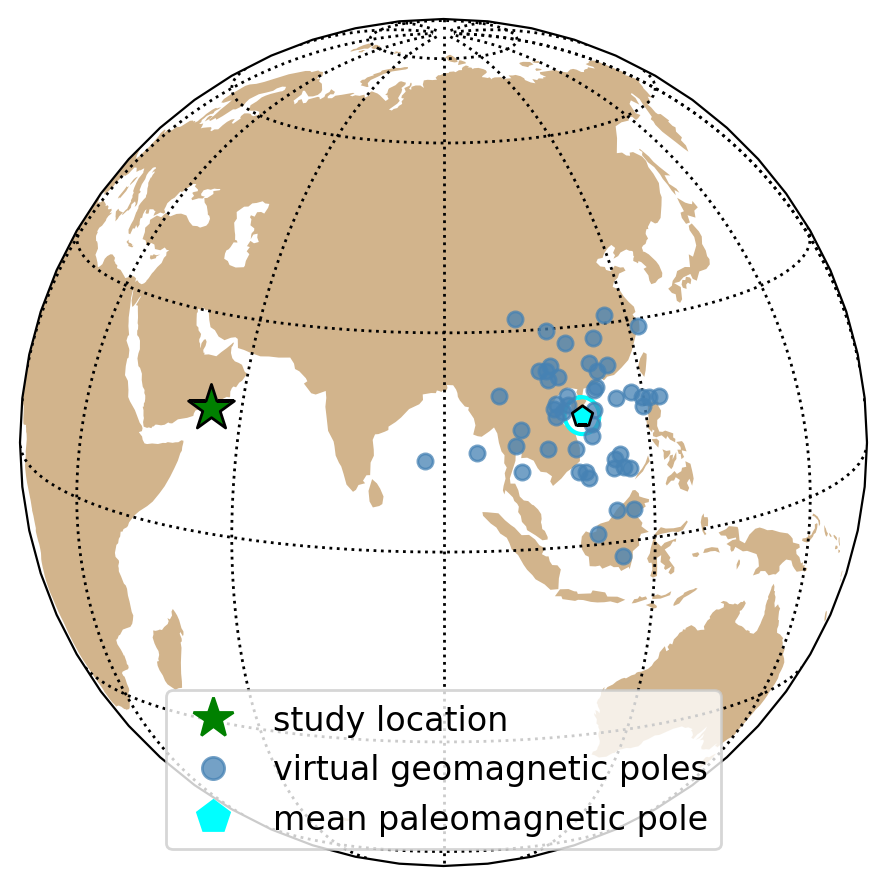

In [16]:
Mirbat_area_lon = 54.9426
Mirbat_area_lat = 17.1110

map_axis = ipmag.make_orthographic_map(central_longitude=90,central_latitude=15,
                                       figsize=(5.5,5.5),land_edge_color=None)
ipmag.plot_vgp(map_axis,vgp_lon=SD_sites_Leger_NNW_vgp_lon,
               vgp_lat=SD_sites_Leger_NNW_vgp_lat,color='steelblue',
               markersize=30,zorder=20,edge=None,alpha=0.75)
ipmag.plot_vgp(map_axis,vgp_lon=SD_sites_Leger_E_vgp_lon,
               vgp_lat=SD_sites_Leger_E_vgp_lat,color='steelblue',
               markersize=30,zorder=20,edge=None,alpha=0.75)
ipmag.plot_pole(map_axis, mean_Shaat_pole_all['dec'], mean_Shaat_pole_all['inc'], mean_Shaat_pole_all['alpha95'], 
                marker='p',color='aqua', markersize=60)
ipmag.plot_vgp(map_axis,vgp_lon=54.9426,vgp_lat=17.1110,color='green',
               marker='*',markersize=300,zorder=20)
# Create custom legend elements
study_loc = mlines.Line2D([], [], color='green', marker='*', linestyle='None', markersize=15, label='study location')
vgps = mlines.Line2D([], [], color='steelblue', marker='o', linestyle='None', markersize=8, alpha=0.75, label='virtual geomagnetic poles')
mean_pole = mlines.Line2D([], [], color='aqua', marker='p', linestyle='None', markersize=12, label='mean paleomagnetic pole')

# Add the legend to the plot
plt.legend(handles=[study_loc, vgps, mean_pole], loc='lower center', fontsize=12)

plt.savefig('./output/SD_site_data_Leger_mag_pole.pdf', dpi=300)

{'Mode': 'Mode 1',
 'Dec': 110.12329842886388,
 'Inc': 17.808895436468056,
 'N': 51,
 'Mu': 0.988723925777768,
 'Mu_critical': 1.207,
 'Me': 0.6816484620200829,
 'Me_critical': 1.094,
 'Test_result': 'Consistent with Fisher distribution'}

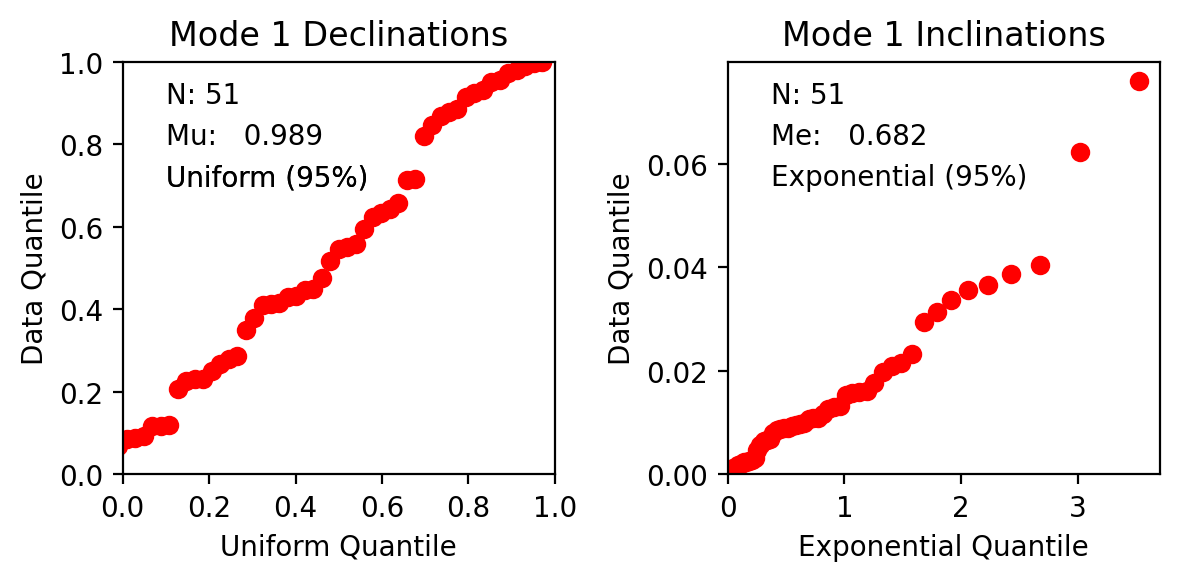

In [17]:
ipmag.fishqq(lon=combined_vgp_lon, lat=combined_vgp_lat)

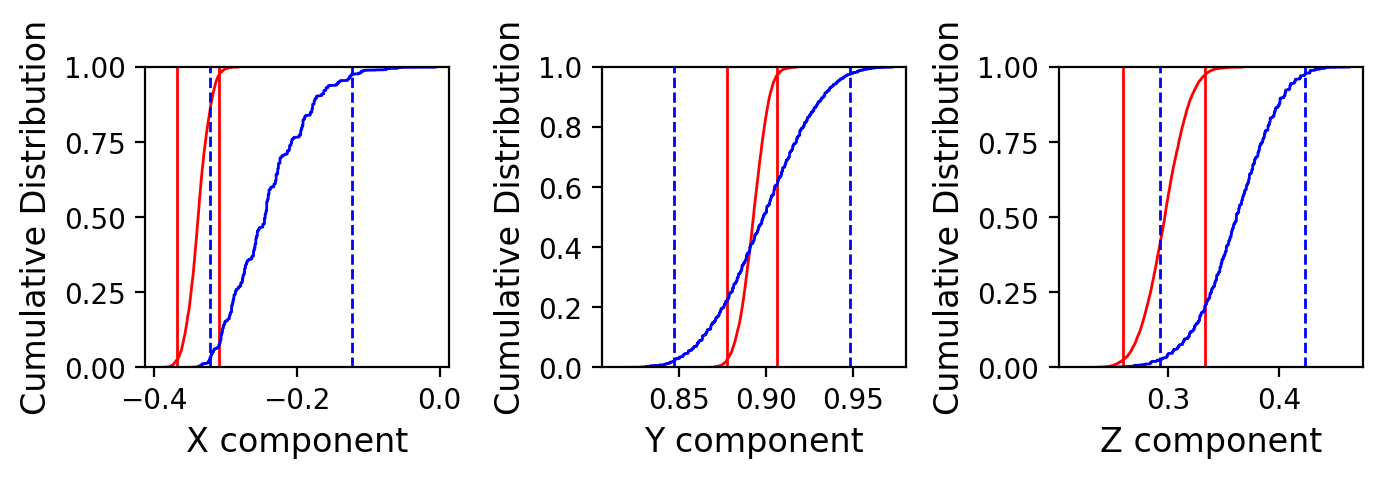

Pass


1

In [18]:
NNW_vgps = ipmag.make_di_block(SD_sites_Leger_NNW_vgp_lon, SD_sites_Leger_NNW_vgp_lat, unit_vector=False)
E_vgps = ipmag.make_di_block(SD_sites_Leger_E_vgp_lon, SD_sites_Leger_E_vgp_lat, unit_vector=False)
ipmag.common_mean_bootstrap(NNW_vgps, E_vgps)

In [19]:
ipmag.common_mean_bayes(NNW_vgps, E_vgps)

Common mean: positive support


(5.563899918050939, 0.8476515467199663, 'Common mean: positive support')

In [20]:
def Deenen_A_95min(N):
    A_95=12*N**(-0.4)
    return A_95
    
def Deenen_A_95max(N):
    A_95=82*N**(-0.63)
    return A_95 

def Deenen_test(N,A_95): 
    
    Deenen_min = Deenen_A_95min(N)
    Deenen_max = Deenen_A_95max(N)
    
    if A_95 < Deenen_min:
        print('A_95 of ' + str(round(A_95,1)) + ' is too small for Deenen criteria of ' +
              str(round(Deenen_min,1)) + ' for this number of sites')
    elif A_95 > Deenen_max:
        print('A_95 of ' + str(round(A_95,1)) + ' is too large for Deenen criteria of ' +
              str(round(Deenen_max,1)) + ' for this number of sites')
    else:
        print('A_95 of ' + str(round(A_95,1)) + ' passes Deenen et al. (2011) criteria of being between ' +
              str(round(Deenen_min,1)) + ' and ' + str(round(Deenen_max,1)) + ' for this number of sites')

In [21]:
Deenen_test(mean_Shaat_pole_all['n'],mean_Shaat_pole_all['alpha95'])

A_95 of 2.5 passes Deenen et al. (2011) criteria of being between 2.5 and 6.9 for this number of sites


Kilner et al. paleopole:
> paleopole at 52.38S, 074.48E (N 5 25 sites;a95 5 7.38).

In [22]:
Kilner_plat = -52.38
Kilner_plon = 74.48
Kilner_pole_Mirbat_dec, Kilner_pole_Mirbat_inc = pmag.vgp_di(Kilner_plat,Kilner_plon,Mirbat_area_lat,Mirbat_area_lon)
Kilner_pole_Mirbat_dec - SD_sites_Leger_all_mag_tc_unified_mean['dec']

87.04281235797154

In [23]:
pole_Mirbat_dec, pole_Mirbat_inc = pmag.vgp_di(mean_Shaat_pole_all['inc'],mean_Shaat_pole_all['dec'],Mirbat_area_lat,Mirbat_area_lon)
pole_Mirbat_dec

80.42673618012788

### Site level plots for pmag figure

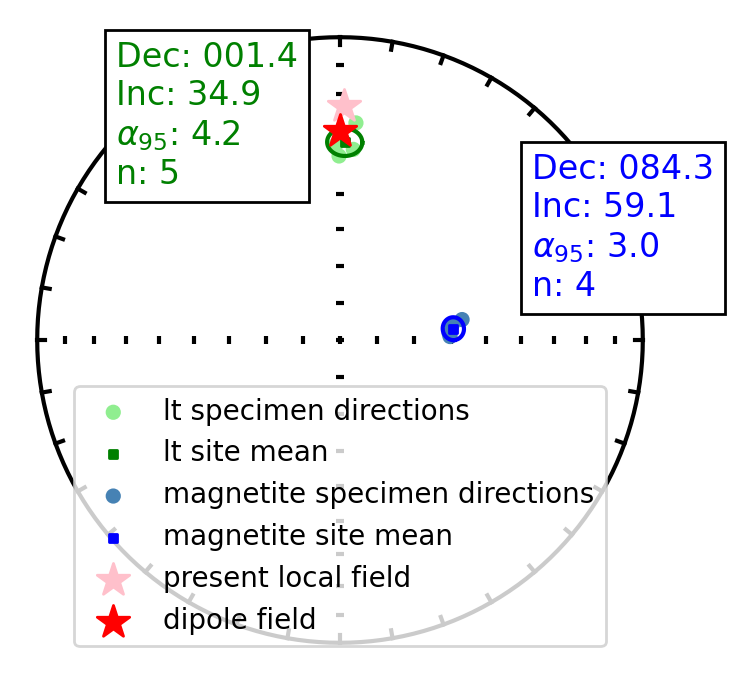

In [24]:
SD_specimen_data_gc_SD68 = SD_specimen_data_gc[SD_specimen_data_gc['site'] == 'SD68'].reset_index(drop=True)
SD68_mag = SD_specimen_data_gc_SD68[SD_specimen_data_gc_SD68['dir_comp'] == 'mag'].reset_index(drop=True)
SD68_lt = SD_specimen_data_gc_SD68[SD_specimen_data_gc_SD68['dir_comp'] == 'lt'].reset_index(drop=True)

SD68_mag_mean = ipmag.fisher_mean(SD68_mag['dir_dec'], SD68_mag['dir_inc'])
SD68_lt_mean = ipmag.fisher_mean(SD68_lt['dir_dec'], SD68_lt['dir_inc'])

plt.figure(figsize=(3.5,3.5))
ipmag.plot_net()
ipmag.plot_di(SD68_lt['dir_dec'], 
              SD68_lt['dir_inc'], 
              color='#90EE90', marker='o', label='lt specimen directions',
              markersize=20)
ipmag.plot_di_mean(SD68_lt_mean['dec'], SD68_lt_mean['inc'], SD68_lt_mean['alpha95'], 
                   color='green', marker='s', markersize = 10, label='lt site mean')
ipmag.plot_di(SD68_mag['dir_dec'], 
              SD68_mag['dir_inc'], 
              color='steelblue', marker='o', label='magnetite specimen directions',
              markersize=20)
ipmag.plot_di_mean(SD68_mag_mean['dec'], SD68_mag_mean['inc'], SD68_mag_mean['alpha95'], 
                   color='blue', marker='s', markersize = 10, label='magnetite site mean')
ipmag.plot_di(Mirbat_plf_dec, Mirbat_plf_inc, color='pink', marker='*', markersize = 150, label='present local field')
ipmag.plot_di(Mirbat_dipole_dec, Mirbat_dipole_inc, color='red', marker='*', markersize = 150, label='dipole field')
plt.legend(loc='lower center')
plt.text(0.8, 0.675, 
         f"Dec: 0{SD68_mag_mean['dec']:.1f}\nInc: {SD68_mag_mean['inc']:.1f}\n$\\alpha_{{95}}$: {SD68_mag_mean['alpha95']:.1f}\nn: {SD68_mag_mean['n']:.0f}", 
         transform=plt.gca().transAxes, fontsize=12, verticalalignment='center', 
         bbox=dict(facecolor='white', alpha=1),color='blue')
plt.text(0.15, 0.85, 
         f"Dec: 00{SD68_lt_mean['dec']:.1f}\nInc: {SD68_lt_mean['inc']:.1f}\n$\\alpha_{{95}}$: {SD68_lt_mean['alpha95']:.1f}\nn: {SD68_lt_mean['n']:.0f}", 
         transform=plt.gca().transAxes, fontsize=12, verticalalignment='center',
         bbox=dict(facecolor='white', alpha=1),color='green')
plt.savefig('./output/SD68_data.pdf', dpi=300)
plt.show()

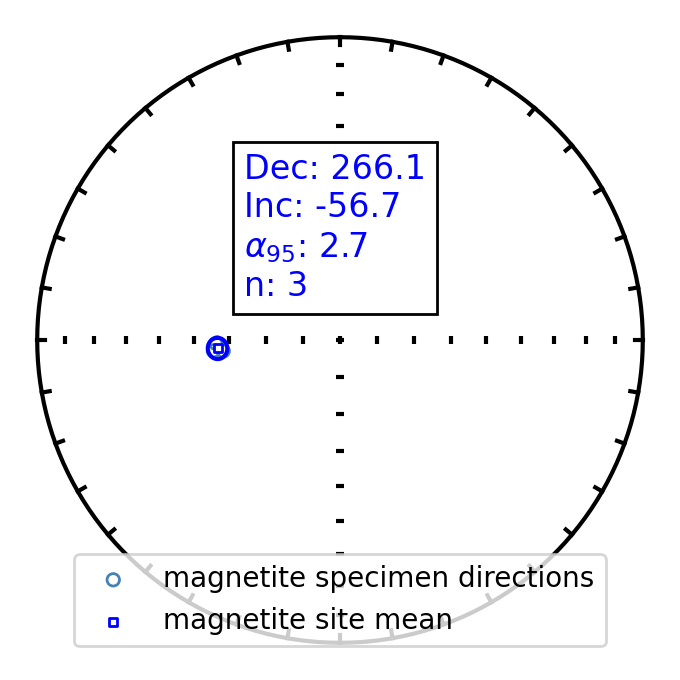

In [25]:
SD_specimen_data_gc_SD56 = SD_specimen_data_gc[SD_specimen_data_gc['site'] == 'SD56'].reset_index(drop=True)
SD56_mag = SD_specimen_data_gc_SD56[SD_specimen_data_gc_SD56['dir_comp'] == 'mag'].reset_index(drop=True)

SD56_mag_mean = ipmag.fisher_mean(SD56_mag['dir_dec'], SD56_mag['dir_inc'])

plt.figure(figsize=(3.5,3.5))
ipmag.plot_net()
ipmag.plot_di(SD56_mag['dir_dec'], 
              SD56_mag['dir_inc'], 
              color='steelblue', marker='o', label='magnetite specimen directions',
              markersize=20)
ipmag.plot_di_mean(SD56_mag_mean['dec'], SD56_mag_mean['inc'], SD56_mag_mean['alpha95'], 
                   color='blue', marker='s', markersize = 10, label='magnetite site mean')
# ipmag.plot_di(Mirbat_plf_dec, Mirbat_plf_inc, color='pink', marker='*', markersize = 150, label='present local field')
# ipmag.plot_di(Mirbat_dipole_dec, Mirbat_dipole_inc, color='red', marker='*', markersize = 150, label='dipole field')
plt.legend(loc='lower center')
plt.text(0.35, 0.675, 
         f"Dec: {SD56_mag_mean['dec']:.1f}\nInc: {SD56_mag_mean['inc']:.1f}\n$\\alpha_{{95}}$: {SD56_mag_mean['alpha95']:.1f}\nn: {SD56_mag_mean['n']:.0f}", 
         transform=plt.gca().transAxes, fontsize=12, verticalalignment='center', 
         bbox=dict(facecolor='white', alpha=1),color='blue')
plt.savefig('./output/SD56_data.pdf', dpi=300)
plt.show()

## Conglomerate test

17 clasts of diabase were sampled from within the diamictite of the Cryogenian Ayn Formation which was deposited unconformable atop the Tonian Shaat dikes. 16 yielded stable interpretable mag components.

The mag component passes a Watson conglomerate test and thus the mt remanence was acquired before the conglomerate of the Ayn Formation was deposited.

In [26]:
# get AynC specimen data
AynC_specimen_data = SD_specimen_data_gc[SD_specimen_data_gc['site'] == 'AynC'].reset_index(drop=True)
AynC_specimen_data_lt = AynC_specimen_data[AynC_specimen_data['dir_comp'] == 'lt'].reset_index(drop=True)
AynC_specimen_mag = AynC_specimen_data[AynC_specimen_data['dir_comp'] == 'mag'].reset_index(drop=True)
AynC_specimen_py = AynC_specimen_data[AynC_specimen_data['dir_comp'] == 'py'].reset_index(drop=True)

AynC_specimen_data_lt_dir_mean = ipmag.fisher_mean(AynC_specimen_data_lt['dir_dec'], AynC_specimen_data_lt['dir_inc'])

### present-local field

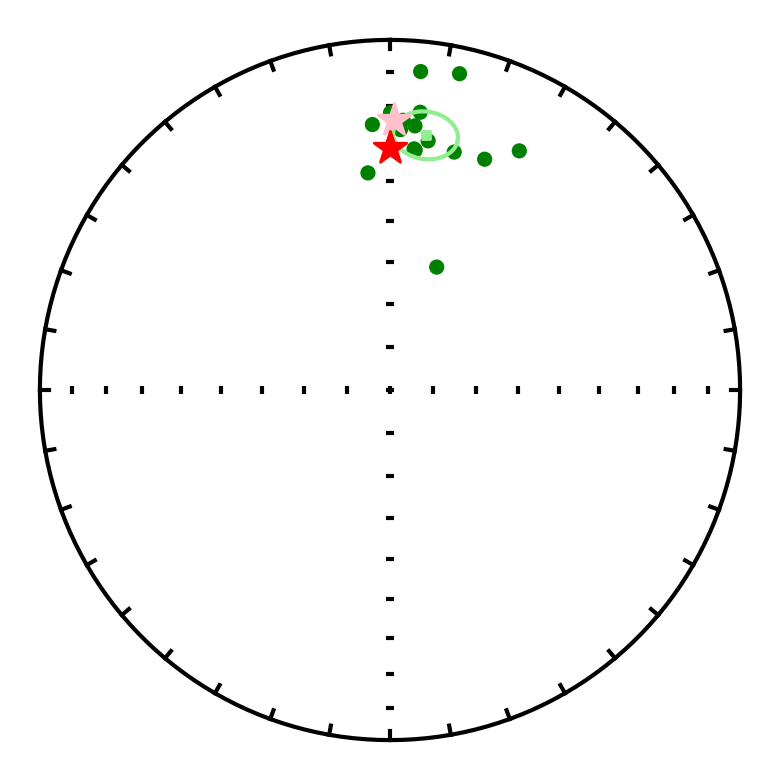

In [27]:
plt.figure(figsize=(4,4))
ipmag.plot_net()
ipmag.plot_di(inc=AynC_specimen_data_lt['dir_inc'], dec=AynC_specimen_data_lt['dir_dec'], color='green', marker='o', label='AynC lt component directions')
# plot specimen lt mean direction
ipmag.plot_di_mean(AynC_specimen_data_lt_dir_mean['dec'], AynC_specimen_data_lt_dir_mean['inc'], AynC_specimen_data_lt_dir_mean['alpha95'], 
                   color='lightgreen', marker='s', markersize = 10, label='Shaat dikes present local field direction mean')
# plot Mirbat present local field direction
ipmag.plot_di(Mirbat_plf_dec, Mirbat_plf_inc, color='pink', marker='*', markersize = 150, label='Mirbat present local field direction')
ipmag.plot_di(Mirbat_dipole_dec, Mirbat_dipole_inc, color='red', marker='*', markersize = 150, label='Mirbat present local field direction')


### magnetite component

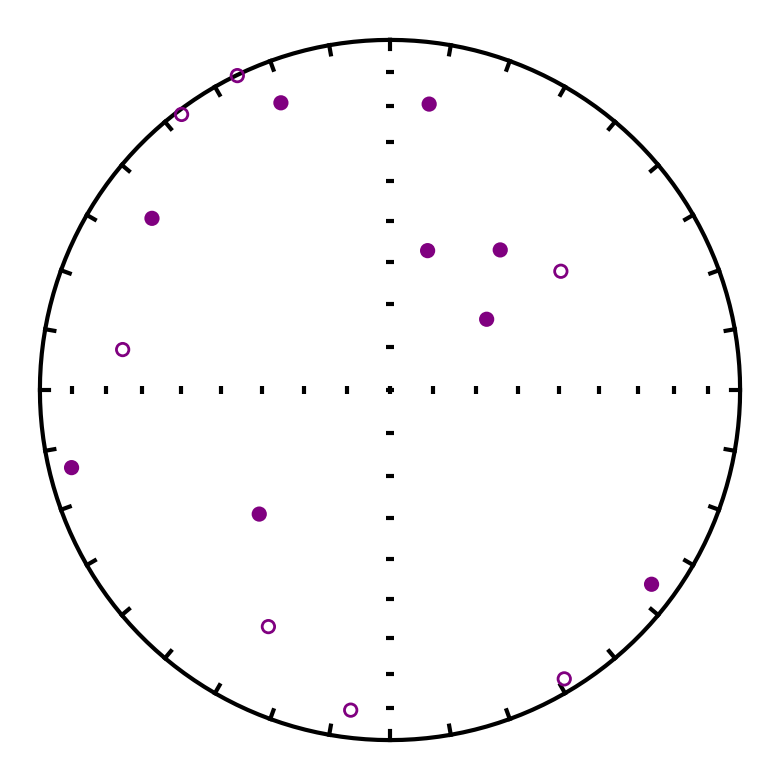

In [28]:
plt.figure(figsize=(4,4))
ipmag.plot_net()
ipmag.plot_di(inc=AynC_specimen_mag['dir_inc'], dec=AynC_specimen_mag['dir_dec'], color='purple', marker='o', label='AynC mag component directions')

In [29]:
# do a pmag conglomerate test on the data
ipmag.conglomerate_test_Watson(ipmag.fisher_mean(AynC_specimen_mag['dir_dec'], AynC_specimen_mag['dir_inc'])['r'], len(AynC_specimen_mag['dir_dec']))

R = 3.8923699349091843
Ro_95 = 6.4
Ro_99 = 7.6
This population "passes" a conglomerate test as the null hypothesis of randomness cannot be rejected at the 95% confidence level


{'n': 16, 'R': 3.8923699349091843, 'Ro_95': 6.4, 'Ro_99': 7.6}

## Shaat dike baked contact test with host metamorphic basement

- samples of site SD19 are all within 0.5 meters of the margin of the dike which is about 5 meters wide

- samples of site S19B: 1-6 are 0.08 meters from the margin, and 7-9 are 7-8 meters from the margin, and 10-12 are 76 meters from the margin


- specimens S19B-10 and -11 do not have stable remanence

- the baked contact test is positive, as the specimens at the contact pass Watson and bootstrap common mean tests (although common mean Bayes result is ambiguous)

In [30]:
# get SD19 specimen and site data
SD19_specimen_data = SD_specimen_data_gc[(SD_specimen_data_gc['site'] == 'SD19') & (SD_specimen_data_gc['dir_comp'] == 'mag')].reset_index(drop=True)
SD19_site_data = SD_site_data_gc[SD_site_data_gc['site'] == 'SD19'].reset_index(drop=True)
SD19_specimen_data

,specimen,experiments,sample,dir_alpha95,dir_comp,dir_dec,dir_inc,dir_n_comps,dir_n_measurements,dir_tilt_correction,...,software_packages,int_corr,citations,method_codes,result_quality,volume,weight,location,site,specimen_name
0,SD19-1,SD19-1_LP-DIR-T,SD19-1,NaN,mag,285.5,-72.6,3.0,10.0,0.0,...,pmagpy-4.2.124: demag_gui,u,This study,LP-DIR-T:DE-BFL-A:DA-DIR-GEO,g,NaN,NaN,Zalawt plain,SD19,SD19-1
1,SD19-2,SD19-2_LP-DIR-T,SD19-2,NaN,mag,278.4,-73.6,2.0,10.0,0.0,...,pmagpy-4.2.124: demag_gui,u,This study,LP-DIR-T:DE-BFL-A:DA-DIR-GEO,g,NaN,NaN,Zalawt plain,SD19,SD19-2
2,SD19-3,SD19-3_LP-DIR-T,SD19-3,NaN,mag,281.8,-59.1,2.0,12.0,0.0,...,pmagpy-4.2.124: demag_gui,u,This study,LP-DIR-T:DE-BFL-A:DA-DIR-GEO,g,NaN,NaN,Zalawt plain,SD19,SD19-3
3,SD19-4,SD19-4_LP-DIR-T,SD19-4,NaN,mag,264.2,-65.3,2.0,10.0,0.0,...,pmagpy-4.2.124: demag_gui,u,This study,LP-DIR-T:DE-BFL-A:DA-DIR-GEO,g,NaN,NaN,Zalawt plain,SD19,SD19-4
4,SD19-5,SD19-5_LP-DIR-T,SD19-5,NaN,mag,272.4,-75.4,2.0,7.0,0.0,...,pmagpy-4.2.124: demag_gui,u,This study,LP-DIR-T:DE-BFL-A:DA-DIR-GEO,g,NaN,NaN,Zalawt plain,SD19,SD19-5
5,SD19-6,SD19-6_LP-DIR-T,SD19-6,NaN,mag,272.9,-62.6,2.0,12.0,0.0,...,pmagpy-4.2.124: demag_gui,u,This study,LP-DIR-T:DE-BFL-A:DA-DIR-GEO,g,NaN,NaN,Zalawt plain,SD19,SD19-6


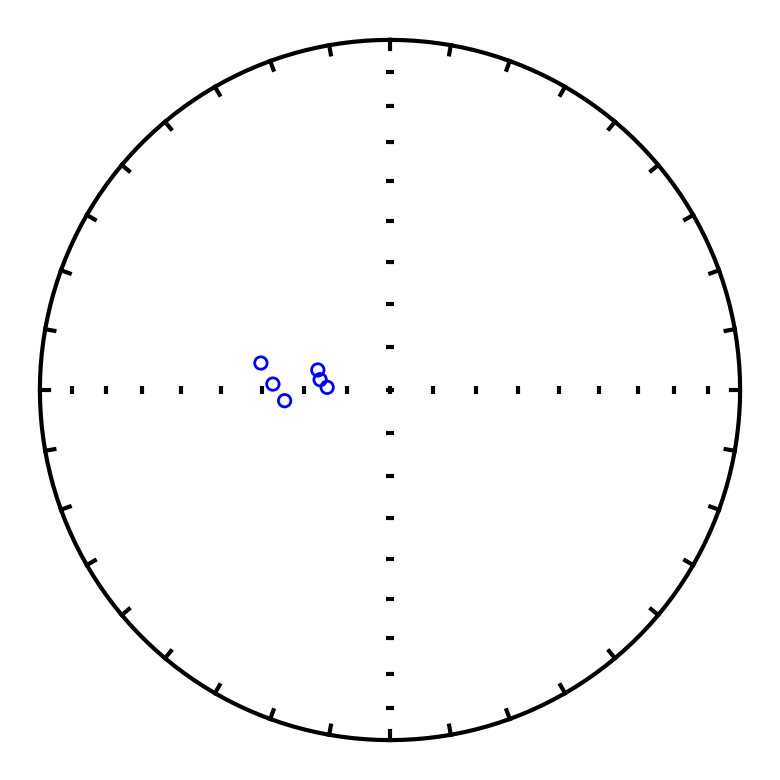

In [31]:
# show SD19 specimen direction
plt.figure(figsize=(4,4))
ipmag.plot_net()
ipmag.plot_di(inc=SD19_specimen_data['dir_inc'], dec=SD19_specimen_data['dir_dec'], color='blue', marker='o', label='SD19')

In [32]:
## get SD19B baked basement rock data

S19B_specimen_data_mt = SD_specimen_data_gc[(SD_specimen_data_gc['site'] == 'S19B') & (SD_specimen_data_gc['dir_comp'] == 'mag')].reset_index(drop=True)
S19B_specimen_data_ht = SD_specimen_data_gc[(SD_specimen_data_gc['site'] == 'S19B') & (SD_specimen_data_gc['dir_comp'] == 'hem')].reset_index(drop=True)

S19B_specimen_data_mt_close = S19B_specimen_data_mt[(S19B_specimen_data_mt['specimen'] != 'S19B-11') & (S19B_specimen_data_mt['specimen'] != 'S19B-12')].reset_index(drop=True)
S19B_specimen_data_mt_far = S19B_specimen_data_mt[(S19B_specimen_data_mt['specimen'] == 'S19B-11') | (S19B_specimen_data_mt['specimen'] == 'S19B-12')].reset_index(drop=True)

S19B_specimen_data_mt_far


,specimen,experiments,sample,dir_alpha95,dir_comp,dir_dec,dir_inc,dir_n_comps,dir_n_measurements,dir_tilt_correction,...,software_packages,int_corr,citations,method_codes,result_quality,volume,weight,location,site,specimen_name
0,S19B-12,S19B-12_LP-DIR-T,S19B-12,NaN,mag,221.3,11.2,2.0,10.0,0.0,...,pmagpy-4.2.124: demag_gui,u,This study,LP-DIR-T:DE-BFL-A:DA-DIR-GEO,g,NaN,NaN,Zalawt plain,S19B,S19B-12


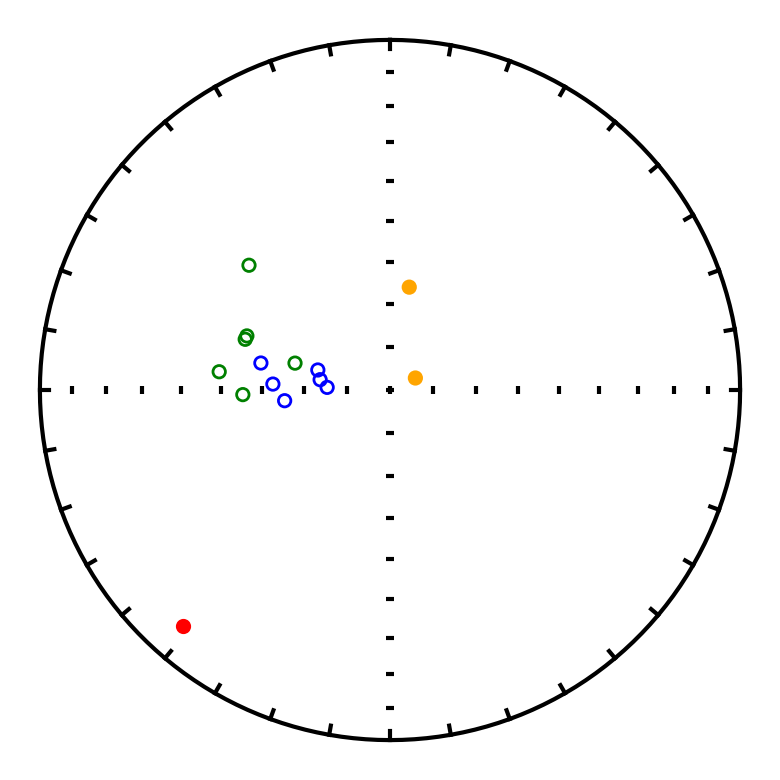

In [33]:
plt.figure(figsize=(4,4))
ipmag.plot_net()
# let's first plot the SD19 directions
ipmag.plot_di(inc=SD19_specimen_data['dir_inc'], dec=SD19_specimen_data['dir_dec'], color='blue', marker='o', label='SD19')

# next let's plot the specimens S19B 1-6 which are closest to the SD19 dike
ipmag.plot_di(inc=S19B_specimen_data_mt_close['dir_inc'], dec=S19B_specimen_data_mt_close['dir_dec'], color='green', marker='o', label='S19B 0.08m to dike')

# next let's plot the specimens S19B 7-9 which are 7 meters from the dike; specimens 7 and 9 have hematite remanence, specimen 8 is gone. 
ipmag.plot_di(inc=S19B_specimen_data_ht['dir_inc'], dec=S19B_specimen_data_ht['dir_dec'], color='orange', marker='o', label='S19B 7m to dike')

# next let's plot the specimens S19B 10-12 data which are 76 meters from the dike
ipmag.plot_di(inc=S19B_specimen_data_mt_far['dir_inc'], dec=S19B_specimen_data_mt_far['dir_dec'], color='red', marker='o', label='S19B 76m from dike')

# plt.legend(loc='lower right')
plt.show()

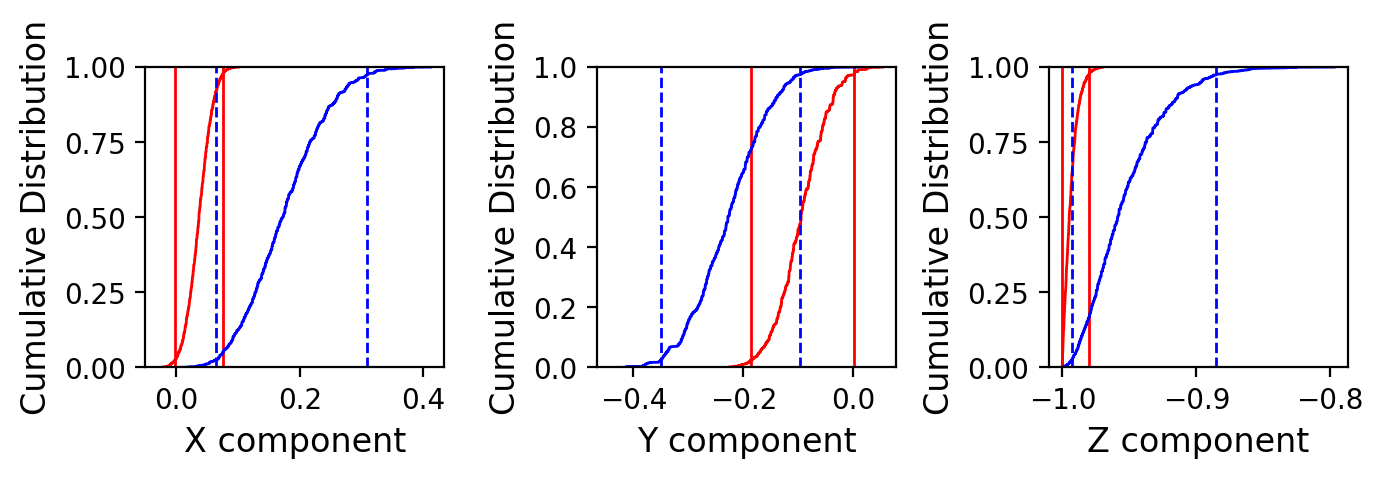

Pass


1

In [34]:
# conduct a common mean test between specimens of SD19 and S19B 1-6
ipmag.common_mean_bootstrap(SD19_specimen_data[['dir_inc','dir_dec']].to_numpy(), 
                            S19B_specimen_data_mt_close[['dir_inc', 'dir_dec']].to_numpy())

In [35]:
ipmag.common_mean_watson(SD19_specimen_data[['dir_inc','dir_dec']].to_numpy(), 
                            S19B_specimen_data_mt_close[['dir_inc', 'dir_dec']].to_numpy())

Results of Watson V test: 

Watson's V:           5.3
Critical value of V:  7.3
"Pass": Since V is less than Vcrit, the null hypothesis
that the two populations are drawn from distributions
that share a common mean direction can not be rejected.

M&M1990 classification:

Angle between data set means: 11.3
Critical angle for M&M1990:   13.2
The McFadden and McElhinny (1990) classification for
this test is: 'C'


(1, 11.271510837217107, 13.226521720754302, 'C')

In [36]:
ipmag.common_mean_bayes(SD19_specimen_data[['dir_inc','dir_dec']].to_numpy(), 
                            S19B_specimen_data_mt_close[['dir_inc', 'dir_dec']].to_numpy())

Ambiguous: weak support


(1.8637432303863273, 0.6508066821811056, 'Ambiguous: weak support')

## Field test results summary

The positive reversal text, positive conglomerate test from the AynC clasts, and the result of the baked contact test on the host rocks support that the magnetite remanence component is a primary magnetization.